In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotels/Hotel Reservations.csv


In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('/kaggle/input/hotels/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Data preparation and data cleaning

In [144]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [145]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df.head().T

,0,1,2,3,4
booking_id,inn00001,inn00002,inn00003,inn00004,inn00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,meal_plan_1,not_selected,meal_plan_1,meal_plan_1,not_selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,room_type_1,room_type_1,room_type_1,room_type_1,room_type_1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [146]:
df.avg_price_per_room = pd.to_numeric(df.avg_price_per_room, errors='coerce').astype(int)

In [147]:
df['arrival_year'] = df['arrival_year'].map({2017: 0, 2018: 1})

In [148]:
df.booking_status = (df.booking_status == 'canceled').astype(int)

In [149]:
df.head().T

,0,1,2,3,4
booking_id,inn00001,inn00002,inn00003,inn00004,inn00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,meal_plan_1,not_selected,meal_plan_1,meal_plan_1,not_selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,room_type_1,room_type_1,room_type_1,room_type_1,room_type_1
lead_time,224,5,1,211,48
arrival_year,0,1,1,1,1


# Split data

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [152]:
len(df_train), len(df_val), len(df_test)

(21765, 7255, 7255)

In [153]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [154]:
y_train = df_train.booking_status.values
y_val = df_val.booking_status.values
y_test = df_test.booking_status.values

del df_train['booking_status']
del df_val['booking_status']
del df_test['booking_status']

# EDA

In [155]:
df_full_train = df_full_train.reset_index(drop=True)

In [156]:
df_full_train.isnull().sum()

booking_id                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [157]:
df_full_train.booking_status.value_counts(normalize=True)

booking_status
0    0.671365
1    0.328635
Name: proportion, dtype: float64

In [158]:
df_full_train.dtypes

booking_id                              object
no_of_adults                             int64
no_of_children                           int64
no_of_weekend_nights                     int64
no_of_week_nights                        int64
type_of_meal_plan                       object
required_car_parking_space               int64
room_type_reserved                      object
lead_time                                int64
arrival_year                             int64
arrival_month                            int64
arrival_date                             int64
market_segment_type                     object
repeated_guest                           int64
no_of_previous_cancellations             int64
no_of_previous_bookings_not_canceled     int64
avg_price_per_room                       int64
no_of_special_requests                   int64
booking_status                           int64
dtype: object

In [159]:
numerical = list(df.select_dtypes(include=[np.int64]).drop(columns=['booking_status']).columns)
numerical

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [160]:
categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [161]:
global_booking_status = df_full_train.booking_status.mean()
global_booking_status

0.3286354238456237

In [162]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).booking_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_booking_status
    df_group['risk'] = df_group['mean'] / global_booking_status
    display(df_group)
    print()
    print()

type_of_meal_plan


,mean,count,diff,risk
type_of_meal_plan,,,,
meal_plan_1,0.312264,22244,-0.016371,0.950184
meal_plan_2,0.459459,2664,0.130824,1.398083
meal_plan_3,0.200000,5,-0.128635,0.608577
not_selected,0.332603,4107,0.003967,1.012072




room_type_reserved


,mean,count,diff,risk
room_type_reserved,,,,
room_type_1,0.323350,22505,-0.005285,0.983918
room_type_2,0.333925,563,0.005290,1.016097
room_type_3,0.333333,6,0.004698,1.014295
room_type_4,0.341352,4822,0.012717,1.038696
room_type_5,0.275701,214,-0.052934,0.838926
room_type_6,0.425641,780,0.097006,1.295177
room_type_7,0.253846,130,-0.074789,0.772425




market_segment_type


,mean,count,diff,risk
market_segment_type,,,,
aviation,0.290000,100,-0.038635,0.882437
complementary,0.000000,305,-0.328635,0.000000
corporate,0.114127,1621,-0.214508,0.347276
offline,0.297832,8394,-0.030804,0.906268
online,0.366828,18600,0.038193,1.116216


In [163]:
!pip install seaborn matplotlib

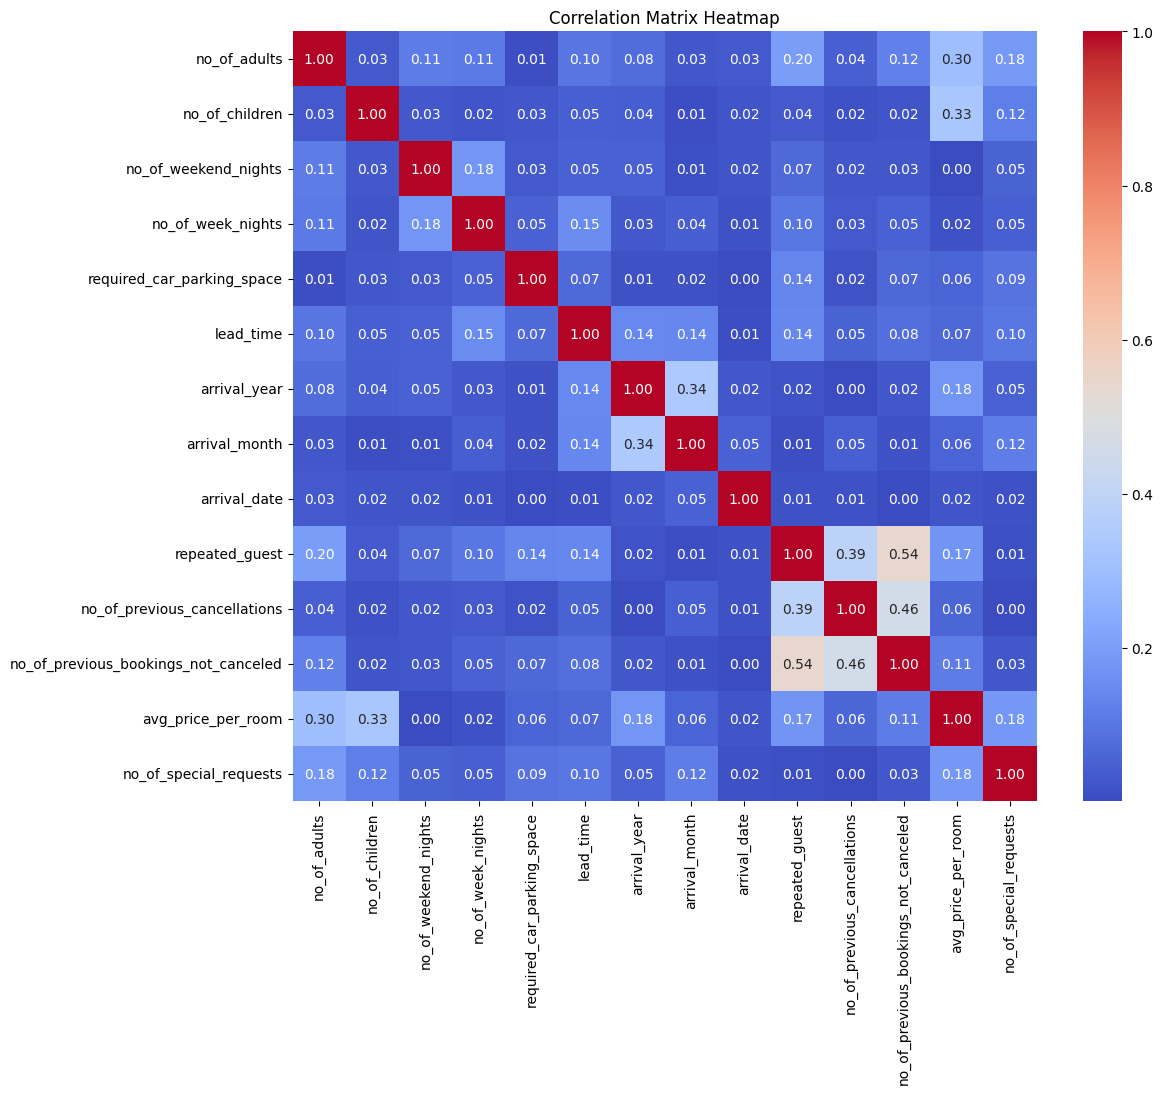

In [164]:
correlation_matrix = df_train[numerical].corr().abs()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [165]:
df_full_train[numerical].corrwith(df_full_train.booking_status).abs()

no_of_adults                            0.091589
no_of_children                          0.036285
no_of_weekend_nights                    0.062028
no_of_week_nights                       0.091316
required_car_parking_space              0.088054
lead_time                               0.438241
arrival_year                            0.180817
arrival_month                           0.010677
arrival_date                            0.010983
repeated_guest                          0.107673
no_of_previous_cancellations            0.035677
no_of_previous_bookings_not_canceled    0.060505
avg_price_per_room                      0.146158
no_of_special_requests                  0.251734
dtype: float64

In [166]:
# Create an empty list to store the results
results = []

# Define the interval size
interval = 10

# Iterate through the intervals
for start_day in range(0, 366, interval):
    end_day = start_day + interval

    # Filter the DataFrame for the current interval
    filtered_df = df_full_train[(df_full_train['lead_time'] > start_day) & (df_full_train['lead_time'] <= end_day)]

    # Calculate the mean of the 'booking_status' for the current interval
    mean_booking_status = round(filtered_df['booking_status'].mean(), 2)

    # Count the '0' (not canceled) and '1' (canceled) values for the current interval
    not_canceled_count = (filtered_df['booking_status'] == 0).sum()
    canceled_count = (filtered_df['booking_status'] == 1).sum()

    # Append the results to the list
    results.append([start_day, end_day, mean_booking_status, not_canceled_count, canceled_count])

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results, columns=['Start Day', 'End Day', 'Mean', 'not_canceled_count', 'canceled_count'])

# Print the results DataFrame
print(results_df)


    Start Day  End Day  Mean  not_canceled_count  canceled_count
0           0       10  0.11                4003             490
1          10       20  0.18                2102             451
2          20       30  0.22                1427             414
3          30       40  0.22                1630             463
4          40       50  0.23                1135             348
5          50       60  0.24                1108             357
6          60       70  0.31                 881             394
7          70       80  0.26                 941             329
8          80       90  0.27                 759             286
9          90      100  0.36                 588             336
10        100      110  0.47                 531             478
11        110      120  0.37                 541             323
12        120      130  0.36                 398             227
13        130      140  0.36                 362             200
14        140      150  0

# One-hot encoding

In [167]:
from sklearn.feature_extraction import DictVectorizer

In [168]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Logistic regression

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [171]:
y_pred = model.predict_proba(X_val)[:, 1]

In [172]:
cancel_decision = (y_pred >= 0.5)

In [173]:
round((y_val == cancel_decision).mean(), 2)

0.81

In [174]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [175]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

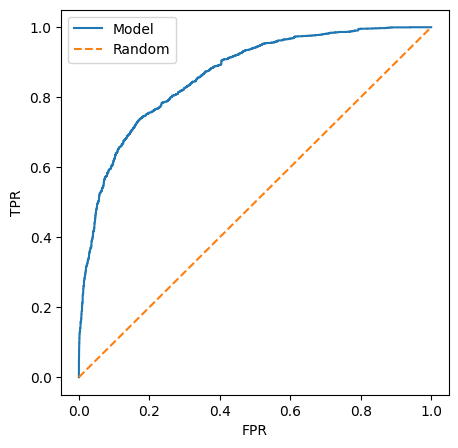

In [176]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [177]:
auc(fpr, tpr)

0.8629753534122726

# K-Fold

In [178]:
!pip install tqdm

In [179]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [180]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [181]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [182]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    rmse_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.booking_status.values
        y_val = df_val.booking_status.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(round(rmse, 3))

    print('C=%s %.3f +- %.3f %.3f' % (C, np.mean(scores), np.std(scores), np.mean(rmse_scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.849 +- 0.005 0.381
C=0.01 0.862 +- 0.004 0.371
C=0.1 0.863 +- 0.004 0.371
C=0.5 0.863 +- 0.004 0.370
C=1 0.863 +- 0.003 0.371
C=5 0.863 +- 0.003 0.370
C=10 0.863 +- 0.003 0.371


In [183]:
dv, model = train(df_full_train, df_full_train.booking_status.values, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
    
print("Logistic regression candidate with C=0.5 AUC=%.3f RMSE=%.3f" % (auc, rmse))

Logistic regression candidate with C=0.5 AUC=0.860 RMSE=0.371


In [184]:
client = {
"no_of_adults": 2,
"no_of_children":  0,
"no_of_weekend_nights": 1,
"no_of_week_nights": 2,
"type_of_meal_plan": "meal_plan_1",
"required_car_parking_space": 0,
"room_type_reserved": "room_type_1",
"lead_time": 224,
"arrival_year": 0,
"arrival_month": 10,
"arrival_date": 2,
"market_segment_type": "offline",
"repeated_guest": 0,
"no_of_previous_cancellations": 0,
"no_of_previous_bookings_not_canceled": 0,
"avg_price_per_room": 65,
"no_of_special_requests": 0
}

In [185]:
df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,inn00001,2,0,1,2,meal_plan_1,0,room_type_1,224,0,10,2,offline,0,0,0,65,0,0
1,inn00002,2,0,2,3,not_selected,0,room_type_1,5,1,11,6,online,0,0,0,106,1,0
2,inn00003,1,0,2,1,meal_plan_1,0,room_type_1,1,1,2,28,online,0,0,0,60,0,1
3,inn00004,2,0,0,2,meal_plan_1,0,room_type_1,211,1,5,20,online,0,0,0,100,0,1
4,inn00005,2,0,1,1,not_selected,0,room_type_1,48,1,4,11,online,0,0,0,94,0,1


In [186]:
X_client = dv.transform([client])
model.predict_proba(X_client)[0, 1]

0.40717130317241584

In [187]:
import pickle

with open('/kaggle/working/model-logistic.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(model, f_out)

In [188]:
with open('/kaggle/working/dv-logistic.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(dv, f_out)

# RIDGE

In [189]:
from sklearn.linear_model import Ridge

In [190]:
def train(df_train, y_train, alpha=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    return dv, model

In [191]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

In [192]:
alpha_values = [0, 0.01, 0.1, 1, 10]
rmse_scores = []
auc_scores = []

for alpha in tqdm(alpha_values):
    y_train = df_train.booking_status.values
    y_val = df_val.booking_status.values

    dv, model = train(df_train, y_train, alpha=alpha)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)
    
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(round(rmse, 3))

for alpha, rmse, auc in zip(alpha_values, rmse_scores, auc_scores):
    print(f"Alpha = {alpha}: RMSE = {rmse} : AUC = {auc}")

  0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha = 0: RMSE = 0.377 : AUC = 0.8676880766901207
Alpha = 0.01: RMSE = 0.377 : AUC = 0.8676882109289759
Alpha = 0.1: RMSE = 0.377 : AUC = 0.8676890163621056
Alpha = 1: RMSE = 0.377 : AUC = 0.8676900902729452
Alpha = 10: RMSE = 0.377 : AUC = 0.867668075100733


In [193]:
dv, model = train(df_full_train, df_full_train.booking_status.values, alpha=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
    
print("Ridge regression candidate with alpha=1.0 AUC=%.3f RMSE=%.3f" % (auc, rmse))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge regression candidate with alpha=1.0 AUC=0.858 RMSE=0.380


In [194]:
X_client = dv.transform([client])
model.predict(X_client)[0]

0.47807409573195286

In [195]:
with open('/kaggle/working/model-ridge.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(model, f_out)

In [196]:
with open('/kaggle/working/dv-ridge.bin', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(dv, f_out)

# RandomForestRegressor

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [198]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(df_train[categorical + numerical].to_dict(orient='records'))
X_val = dv.transform(df_val[categorical + numerical].to_dict(orient='records'))
X_test = dv.transform(df_test[categorical + numerical].to_dict(orient='records'))

In [199]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [200]:
feature_importances = model.feature_importances_
feature_names = dv.get_feature_names_out()
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by importance in descending order
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print the feature names and their importances
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance}")


lead_time: 0.3555266292704733
avg_price_per_room: 0.16322015724164976
market_segment_type=online: 0.09003652428982299
arrival_date: 0.08445627468997634
arrival_month: 0.06931008305237839
no_of_special_requests: 0.0691384644892119
no_of_week_nights: 0.04519770425291468
no_of_weekend_nights: 0.034477931324228266
no_of_adults: 0.027761451370905642
arrival_year: 0.012805303639662537
required_car_parking_space: 0.0069345333521979285
type_of_meal_plan=meal_plan_1: 0.00662034099100367
room_type_reserved=room_type_1: 0.0055513809993254825
room_type_reserved=room_type_4: 0.005329414442778411
no_of_children: 0.0049434113261668505
type_of_meal_plan=not_selected: 0.004831103047514441
market_segment_type=offline: 0.0036493692333260494
type_of_meal_plan=meal_plan_2: 0.0029198591744824215
market_segment_type=corporate: 0.001695188157576475
room_type_reserved=room_type_2: 0.0016465146872825165
room_type_reserved=room_type_5: 0.0012713339742507787
room_type_reserved=room_type_6: 0.0007769434590332755
r

In [201]:
rmse_scores = []
auc_scores = []

for n in tqdm(range(10, 201, 20)):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    
    auc = roc_auc_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    rmse_scores.append((n, rmse))
    auc_scores.append((n, auc))

  0%|          | 0/10 [00:00<?, ?it/s]

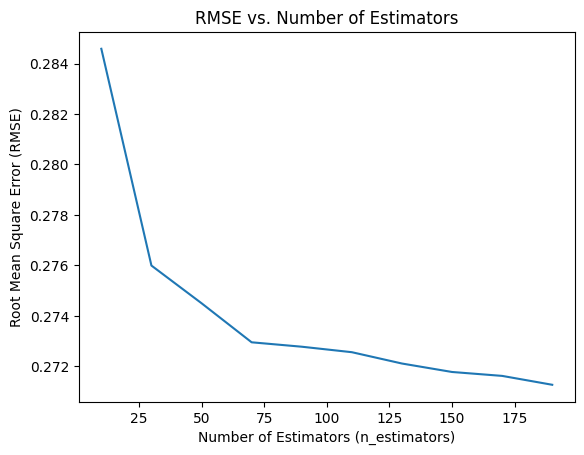

In [202]:
df_scores = pd.DataFrame(rmse_scores, columns=['n_estimators', 'rmse'])
import matplotlib.pyplot as plt

plt.plot(df_scores['n_estimators'], df_scores['rmse'])
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE vs. Number of Estimators')
plt.show()

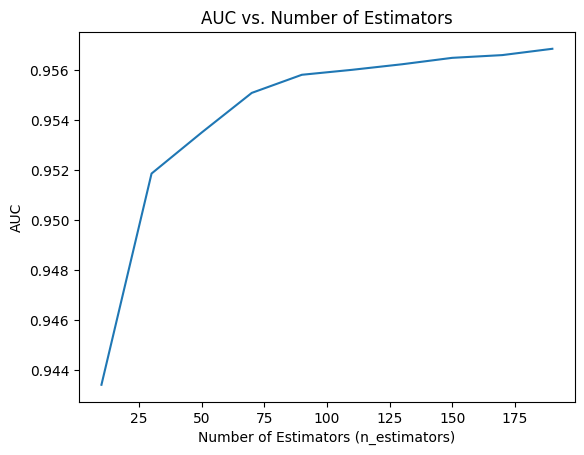

In [203]:
df_scores = pd.DataFrame(auc_scores, columns=['n_estimators', 'auc'])
import matplotlib.pyplot as plt

plt.plot(df_scores['n_estimators'], df_scores['auc'])
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Estimators')
plt.show()

In [204]:
# scores = []

# for d in tqdm([1, 5, 10, 15, 20, 25]):
#     mean_rmse_values = []
#     for n in tqdm(range(10, 201, 20)):
#         rf = RandomForestRegressor(n_estimators=n,
#                                     max_depth=d,
#                                     random_state=1)
#         rf.fit(X_train, y_train)

#         y_pred = rf.predict(X_val)
#         rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#         mean_rmse_values.append(rmse)
        
#     mean_rmse = np.mean(mean_rmse_values)
#     scores.append((d, mean_rmse))

In [205]:
# df_scores = pd.DataFrame(scores, columns=['max_depth', 'mean_rmse'])
# df_scores

In [206]:
model = RandomForestRegressor(n_estimators=200,
                                    max_depth=20,
                                    random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

auc = roc_auc_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
    
print("RandomForest regression candidate AUC=%.3f RMSE=%.3f" % (auc, rmse))

RandomForest regression candidate AUC=0.956 RMSE=0.271


In [207]:
bad_client = {
"no_of_adults": 2,
"no_of_children":  0,
"no_of_weekend_nights": 0,
"no_of_week_nights": 2,
"type_of_meal_plan": "meal_plan_1",
"required_car_parking_space": 0,
"room_type_reserved": "room_type_1",
"lead_time": 211,
"arrival_year": 1,
"arrival_month": 5,
"arrival_date": 20,
"market_segment_type": "online",
"repeated_guest": 0,
"no_of_previous_cancellations": 0,
"no_of_previous_bookings_not_canceled": 0,
"avg_price_per_room": 100,
"no_of_special_requests": 0
}

In [208]:
X_client = dv.transform(client)
print(X_client.toarray())
model.predict(X_client)[0]

[[  2.  10.   0.  65. 224.   0.   0.   0.   1.   0.   2.   0.   0.   0.
    0.   2.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   1.   0.
    0.   0.]]


0.0

In [209]:
with open('/kaggle/working/model-randomforest.pkl', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(model, f_out)

In [210]:
with open('/kaggle/working/dv-randomforest.pkl', 'wb') as f_out: # 'wb' means write-binary
    pickle.dump(dv, f_out)

# XGBoost

In [211]:
!pip install xgboost

In [212]:
import xgboost as xgb

In [213]:
# Create DMatrix for training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Create DMatrix for validation data
dval = xgb.DMatrix(X_val, label=y_val)

In [214]:
watchlist = [(dtrain, 'train'), (dval, 'validation')]

In [215]:
# Train models with different eta values
num_round = 100  # Number of boosting rounds
scores = []
for eta in tqdm([0.1, 0.3, 0.5, 0.7, 0.9]):
    mean_rmse_values = []
    for depth in tqdm([3, 5, 7, 9]):
        xgb_params = {
           'eta': eta,
           'max_depth': depth,
           'min_child_weight': 1,
           'objective': 'reg:squarederror',
           'nthread': 8,
           'seed': 1,
           'verbosity': 0
        }
        model = xgb.train(xgb_params, dtrain, num_round, watchlist)
        rmse = float(model.eval(dval).split(":")[1])
        mean_rmse_values.append(round(rmse,3))
        print(f"ETA = {eta}, depth = {depth} :  RMSE = {rmse}")
    print(mean_rmse_values)
    mean_rmse = np.mean(mean_rmse_values)
    scores.append((eta, mean_rmse))


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[0]	train-rmse:0.47969	validation-rmse:0.47933
[1]	train-rmse:0.46259	validation-rmse:0.46189
[2]	train-rmse:0.44817	validation-rmse:0.44727
[3]	train-rmse:0.43599	validation-rmse:0.43507
[4]	train-rmse:0.42648	validation-rmse:0.42553
[5]	train-rmse:0.41722	validation-rmse:0.41600
[6]	train-rmse:0.40986	validation-rmse:0.40862
[7]	train-rmse:0.40334	validation-rmse:0.40220
[8]	train-rmse:0.39779	validation-rmse:0.39676
[9]	train-rmse:0.39279	validation-rmse:0.39182
[10]	train-rmse:0.38807	validation-rmse:0.38697
[11]	train-rmse:0.38419	validation-rmse:0.38314


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[12]	train-rmse:0.38059	validation-rmse:0.37939
[13]	train-rmse:0.37762	validation-rmse:0.37655
[14]	train-rmse:0.37496	validation-rmse:0.37378
[15]	train-rmse:0.37233	validation-rmse:0.37130
[16]	train-rmse:0.36997	validation-rmse:0.36897
[17]	train-rmse:0.36836	validation-rmse:0.36732
[18]	train-rmse:0.36665	validation-rmse:0.36581
[19]	train-rmse:0.36477	validation-rmse:0.36388
[20]	train-rmse:0.36324	validation-rmse:0.36227
[21]	train-rmse:0.36194	validation-rmse:0.36099
[22]	train-rmse:0.36044	validation-rmse:0.35958
[23]	train-rmse:0.35932	validation-rmse:0.35841
[24]	train-rmse:0.35820	validation-rmse:0.35733
[25]	train-rmse:0.35704	validation-rmse:0.35626
[26]	train-rmse:0.35619	validation-rmse:0.35544
[27]	train-rmse:0.35522	validation-rmse:0.35449
[28]	train-rmse:0.35417	validation-rmse:0.35335
[29]	train-rmse:0.35367	validation-rmse:0.35278
[30]	train-rmse:0.35297	validation-rmse:0.35193
[31]	train-rmse:0.35234	validation-rmse:0.35127
[32]	train-rmse:0.35123	validation-rmse:

  0%|          | 0/4 [00:00<?, ?it/s]

[0]	train-rmse:0.44339	validation-rmse:0.44228
[1]	train-rmse:0.41206	validation-rmse:0.41088
[2]	train-rmse:0.39461	validation-rmse:0.39342
[3]	train-rmse:0.38110	validation-rmse:0.37981
[4]	train-rmse:0.37093	validation-rmse:0.36923
[5]	train-rmse:0.36434	validation-rmse:0.36246
[6]	train-rmse:0.36023	validation-rmse:0.35854
[7]	train-rmse:0.35743	validation-rmse:0.35567
[8]	train-rmse:0.35540	validation-rmse:0.35381
[9]	train-rmse:0.35285	validation-rmse:0.35111
[10]	train-rmse:0.35118	validation-rmse:0.34937
[11]	train-rmse:0.35000	validation-rmse:0.34814
[12]	train-rmse:0.34842	validation-rmse:0.34664
[13]	train-rmse:0.34720	validation-rmse:0.34560
[14]	train-rmse:0.34596	validation-rmse:0.34459
[15]	train-rmse:0.34415	validation-rmse:0.34331
[16]	train-rmse:0.34253	validation-rmse:0.34149
[17]	train-rmse:0.34197	validation-rmse:0.34082
[18]	train-rmse:0.34138	validation-rmse:0.34050
[19]	train-rmse:0.34027	validation-rmse:0.33964
[20]	train-rmse:0.33950	validation-rmse:0.33917
[2

  0%|          | 0/4 [00:00<?, ?it/s]

[0]	train-rmse:0.41407	validation-rmse:0.41221
[1]	train-rmse:0.38484	validation-rmse:0.38281
[2]	train-rmse:0.36883	validation-rmse:0.36703
[3]	train-rmse:0.36004	validation-rmse:0.35841
[4]	train-rmse:0.35503	validation-rmse:0.35390
[5]	train-rmse:0.35186	validation-rmse:0.35061
[6]	train-rmse:0.34818	validation-rmse:0.34679
[7]	train-rmse:0.34685	validation-rmse:0.34514
[8]	train-rmse:0.34517	validation-rmse:0.34328
[9]	train-rmse:0.34391	validation-rmse:0.34242
[10]	train-rmse:0.34302	validation-rmse:0.34141
[11]	train-rmse:0.34220	validation-rmse:0.34046
[12]	train-rmse:0.34165	validation-rmse:0.33986
[13]	train-rmse:0.34004	validation-rmse:0.33821
[14]	train-rmse:0.33771	validation-rmse:0.33573
[15]	train-rmse:0.33646	validation-rmse:0.33447
[16]	train-rmse:0.33509	validation-rmse:0.33370
[17]	train-rmse:0.33457	validation-rmse:0.33343
[18]	train-rmse:0.33416	validation-rmse:0.33313
[19]	train-rmse:0.33384	validation-rmse:0.33277
[20]	train-rmse:0.33327	validation-rmse:0.33251
[2

  0%|          | 0/4 [00:00<?, ?it/s]

[0]	train-rmse:0.39331	validation-rmse:0.39073
[1]	train-rmse:0.37103	validation-rmse:0.36747
[2]	train-rmse:0.36135	validation-rmse:0.35891
[3]	train-rmse:0.35506	validation-rmse:0.35318
[4]	train-rmse:0.35157	validation-rmse:0.35027
[5]	train-rmse:0.34898	validation-rmse:0.34725
[6]	train-rmse:0.34605	validation-rmse:0.34427
[7]	train-rmse:0.34341	validation-rmse:0.34210
[8]	train-rmse:0.34233	validation-rmse:0.34112
[9]	train-rmse:0.33938	validation-rmse:0.33889
[10]	train-rmse:0.33851	validation-rmse:0.33855
[11]	train-rmse:0.33617	validation-rmse:0.33696
[12]	train-rmse:0.33503	validation-rmse:0.33589
[13]	train-rmse:0.33358	validation-rmse:0.33466
[14]	train-rmse:0.33170	validation-rmse:0.33309
[15]	train-rmse:0.33063	validation-rmse:0.33216
[16]	train-rmse:0.33029	validation-rmse:0.33201
[17]	train-rmse:0.32951	validation-rmse:0.33135
[18]	train-rmse:0.32912	validation-rmse:0.33081
[19]	train-rmse:0.32874	validation-rmse:0.33028
[20]	train-rmse:0.32760	validation-rmse:0.32945
[2

  0%|          | 0/4 [00:00<?, ?it/s]

[0]	train-rmse:0.38249	validation-rmse:0.37930
[1]	train-rmse:0.36622	validation-rmse:0.36242
[2]	train-rmse:0.35721	validation-rmse:0.35341
[3]	train-rmse:0.35223	validation-rmse:0.34899
[4]	train-rmse:0.34954	validation-rmse:0.34653
[5]	train-rmse:0.34665	validation-rmse:0.34423
[6]	train-rmse:0.34557	validation-rmse:0.34350
[7]	train-rmse:0.34368	validation-rmse:0.34163
[8]	train-rmse:0.34129	validation-rmse:0.33928
[9]	train-rmse:0.33852	validation-rmse:0.33766
[10]	train-rmse:0.33709	validation-rmse:0.33713
[11]	train-rmse:0.33525	validation-rmse:0.33591
[12]	train-rmse:0.33326	validation-rmse:0.33460
[13]	train-rmse:0.33236	validation-rmse:0.33367
[14]	train-rmse:0.33165	validation-rmse:0.33258
[15]	train-rmse:0.33108	validation-rmse:0.33303
[16]	train-rmse:0.32945	validation-rmse:0.33128
[17]	train-rmse:0.32917	validation-rmse:0.33088
[18]	train-rmse:0.32852	validation-rmse:0.33038
[19]	train-rmse:0.32780	validation-rmse:0.33009
[20]	train-rmse:0.32745	validation-rmse:0.32960
[2

In [216]:
df_scores = pd.DataFrame(scores, columns=['eta', 'mean_rmse'])
df_scores

,eta,mean_rmse
0,0.1,0.30000
1,0.3,0.29400
2,0.5,0.29875
3,0.7,0.30875
4,0.9,0.31825


In [217]:
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist_test = [(dtrain, 'train'), (dtest, 'validation')]

xgb_params_test = {
           'eta': 0.1,
           'max_depth': 9,
           'min_child_weight': 1,
           'objective': 'reg:squarederror',
           'nthread': 8,
           'seed': 1,
           'verbosity': 0
        }

model = xgb.train(xgb_params, dtrain, num_round, watchlist_test)
rmse = float(model.eval(dtest).split(":")[1])
rmse

[0]	train-rmse:0.30161	validation-rmse:0.31299
[1]	train-rmse:0.28209	validation-rmse:0.30268
[2]	train-rmse:0.26993	validation-rmse:0.30192
[3]	train-rmse:0.26374	validation-rmse:0.30184


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	train-rmse:0.25840	validation-rmse:0.30209
[5]	train-rmse:0.25227	validation-rmse:0.30079
[6]	train-rmse:0.24152	validation-rmse:0.30156
[7]	train-rmse:0.23611	validation-rmse:0.30116
[8]	train-rmse:0.23129	validation-rmse:0.30159
[9]	train-rmse:0.22444	validation-rmse:0.30185
[10]	train-rmse:0.21928	validation-rmse:0.30336
[11]	train-rmse:0.21480	validation-rmse:0.30418
[12]	train-rmse:0.20694	validation-rmse:0.30578
[13]	train-rmse:0.20377	validation-rmse:0.30637
[14]	train-rmse:0.19941	validation-rmse:0.30717
[15]	train-rmse:0.19719	validation-rmse:0.30730
[16]	train-rmse:0.19320	validation-rmse:0.30777
[17]	train-rmse:0.18964	validation-rmse:0.30822
[18]	train-rmse:0.18424	validation-rmse:0.30943
[19]	train-rmse:0.18074	validation-rmse:0.30970
[20]	train-rmse:0.17527	validation-rmse:0.31063
[21]	train-rmse:0.17362	validation-rmse:0.31100
[22]	train-rmse:0.16811	validation-rmse:0.31098
[23]	train-rmse:0.16334	validation-rmse:0.31279
[24]	train-rmse:0.15756	validation-rmse:0.3141

0.3291383926617202

# Model comparison RMSE and AUC
* Logisitic regression - AUC=0.860 RMSE=0.371
* Ridge regression - AUC=0.858 RMSE=0.380
* Random Forest Regressor - AUC=0.956 RMSE=0.271
* XGBoost - RMSE = 0.329

Maximum AUC and lowest RMSE is for Random Forest Regressor model with n_estimators=200 and max_depth=20. 